In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer

from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Fusion import FFCCLattice_BranchedFusions
from FusionLatticesAnalysis.FFCCLattice_BranchFusion import decoder_successprob_error_vs_loss_list_parallelized as decoder

Loaded C++ linear algebra functions for Linux OS


# Example: Fusion-based FFCC lattice - branched chains

In [8]:
L = 3

Lattice = FFCCLattice_BranchedFusions(L, L, L)

print('# fusions:', Lattice.num_primal_qbts)

print('\n primal fusions matching matrix:')
H_matrix = Lattice.get_matching_matrix()
print(H_matrix)

print('\n Adjacency matrix of syndrom graph:')
synd_graph_amat = (H_matrix @ H_matrix.T) %2
print(synd_graph_amat)

# fusions: 486

 primal fusions matching matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

 Adjacency matrix of syndrom graph:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Loss-only error model

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  83.59397948498372  s


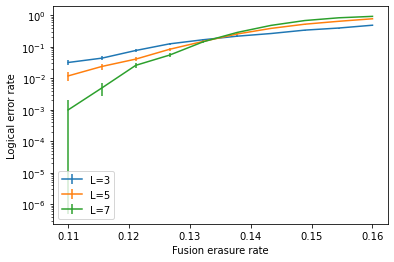

In [9]:
### Identify loss threshold for the lattice, assuming no Pauli errors
### Runs in approximately 1 minute

loss_min = 0.11
loss_max = 0.16

num_trials = 1000

num_steps = 10

L_list = np.arange(3, 8, 2)

eras_ps = np.linspace(loss_min, loss_max, num_steps)
err_vs_eras_vals = np.array([(0, eras_p) for eras_p in eras_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(eras_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')
plt.yscale('log')
plt.xlabel("Fusion erasure rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Error-only error model

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  4.466995632043108  s


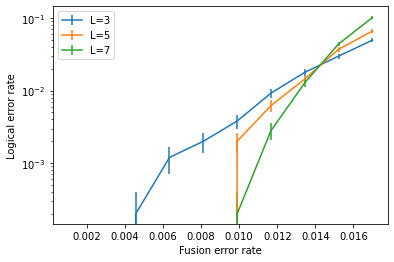

In [10]:
### Identify an Puali error rate threshold for the lattice, assuming no loss
### Runs in approximately 5 seconds

err_min = 0.001
err_max = 0.017

num_trials = 5000

num_steps = 10

L_list = np.arange(3, 8, 2)

err_ps = np.linspace(err_min, err_max, num_steps)
err_vs_eras_vals = np.array([(err_p, 0.) for err_p in err_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(err_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("Fusion error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Both errors and losses

Error rate, Loss rate
[[0.00154508 0.04755283]
 [0.00178788 0.05400642]
 [0.00203068 0.06046002]
 [0.00227348 0.06691362]
 [0.00251628 0.07336722]
 [0.00275908 0.07982081]
 [0.00300188 0.08627441]
 [0.00324468 0.09272801]
 [0.00348748 0.09918161]
 [0.00373028 0.10563521]
 [0.00397308 0.1120888 ]
 [0.00421587 0.1185424 ]
 [0.00445867 0.124996  ]
 [0.00470147 0.1314496 ]
 [0.00494427 0.13790319]] 

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  272.2397393559804  s


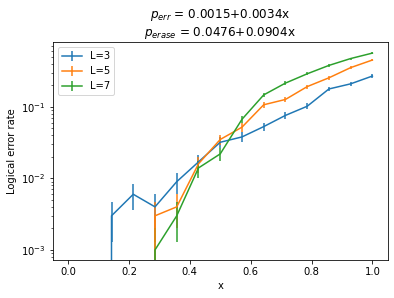

In [11]:
### Identify a threshold for the lattice in presence of both Pauli errors and losses

### For a given theta, loss and error rates are given by linear interpolations:
### loss = (loss_max - loss_min + x*loss_min) * cos(theta)
### error = (err_max - err_min + x*err_min) * sin(theta)
### with x ranging 0 to 1 in the scan.

### Runs in approximately 1 minute

loss_min = 0.05
loss_max = 0.145

err_min = 0.005
err_max = 0.016

num_loss_trials = 1000
num_ec_runs_per_loss_trial = 1

num_steps = 15
num_scans = 5

L_list = np.arange(3, 8, 2)


theta =  2*np.pi / 5.

x_vals = np.linspace(0, 1, num_steps)

err_vs_eras_vals_allvals = []
all_data = np.array([[None] * len(L_list)] * num_scans)

err_offset = err_min * np.cos(theta)
err_m = (err_max - err_min) * np.cos(theta)

loss_offset = loss_min * np.sin(theta)
loss_m = (loss_max - loss_min) * np.sin(theta)


err_vs_eras_vals = np.array([(err_m * x + err_offset,
                              loss_m * x + loss_offset) for x in x_vals])
print('Error rate, Loss rate')
print(err_vs_eras_vals, '\n')


plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = decoder(err_vs_eras_vals, L, num_loss_trials=num_loss_trials, num_ec_runs_per_loss_trial=num_ec_runs_per_loss_trial)
    plt.errorbar(x_vals, this_data,
                 yerr=(this_data * (1 - this_data) / (num_loss_trials * num_ec_runs_per_loss_trial)) ** 0.5,
                 label="L={}".format(L))
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("x")
plt.ylabel("Logical error rate")

if np.sin(theta)==0:
    title_label_err = r'$p_{err}$ = '+str(err_offset)
else:
    title_label_err = r'$p_{err}$ = '+str(np.round(err_offset,4))+'+'+str(np.round(err_m,4))+'x'

if np.cos(theta)==0:
    title_label_loss = r'$p_{erase}$ = '+str(loss_offset)
else:
    title_label_loss = r'$p_{erase}$ = '+str(np.round(loss_offset,4))+'+'+str(np.round(loss_m,4))+'x'
      
plt.title(title_label_err+'\n'+title_label_loss)
plt.legend()
plt.show()